In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
#this next line is only needed in iPython notebooks
%matplotlib inline 
import math
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
font = fm.FontProperties(family = 'Gill Sans', fname = '/Library/Fonts/GillSans.ttc', size = 12)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def hide_spines(intx=False,inty=False):
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties=font) 
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
           # ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_yticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            ax.set_title(ax.get_title(), fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
def show(nm,a=0,b=0,show=1):
    hide_spines(a,b)
    #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    #plt.yticks([1,1e-2,1e-4,1e-6,1e-8,1e-10,1e-12], labels)
    #ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    if (len(nm)>0):
        plt.savefig(nm,bbox_inches='tight');
    if show:
        plt.show()
    else:
        plt.close()

The equation for the damped pendulum is $$ \frac{d ^2\theta}{dt} + \frac{b}{m} \frac{d \theta}{dt} + \frac{g}{l} \sin \theta = 0.$$

Defining $y(t) = \theta'(t)$, we get the system
$$ y'(t) = -\frac{b}{m} y(t) - \frac{g}{l} \sin \theta,$$
$$ \theta'(t) = y(t).$$

In [2]:
#define function for RHS
b = 0.1
l = 2.5
g = 9.81
m = 0.25

print(b/m,g/l)
RHS = lambda t,x: [-b/m * x[0] - g/l*math.sin(x[1]), x[0]]

0.4 3.9240000000000004


In [3]:
#y0=[-4.283866414839002,math.pi/1.05] stops at the top
solution = solve_ivp(fun=RHS, y0=[-4.283866414838997,math.pi/1.05], t_span=[0,25], max_step=0.001, method="RK45", first_step = 0.001)

/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ivp/common.py:32: UserWarning: The following arguments have no effect for a chosen solver: `first_step`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


In [122]:
def get_sample(runs,points):
    y_vect = np.zeros(runs*points)
    x_mat = np.zeros((runs*points, 28))
    basis_dict = lambda pos, vel: np.array([pos, pos**2, pos**3, pos**4, pos**5, math.cos(pos), math.sin(pos), math.sin(pos)**2, math.cos(pos)**2,
                                            vel, vel**2, vel**3, vel**4, vel**5, math.cos(vel), math.sin(vel), math.sin(vel)**2, math.cos(vel)**2,
                                            pos*vel, (pos**2)*vel, pos*vel**2, (pos**2)*(vel**2), (pos**3)*(vel), (pos)*(vel**3), (pos**2)*(vel**3), (pos**3)*(vel**2),
                                            math.cos(pos*vel), math.sin(pos*vel)])
    count = 0
    
    for run in range(runs):
        init_vel = random.uniform(a=-10,b=10)
        init_pos = random.uniform(a=-np.pi, b=np.pi)
        solution = solve_ivp(fun=RHS, y0=[init_vel, init_pos], t_span=[0,25], max_step=0.01, method="RK45")
        steps = solution.t.size
        chosen_points = np.random.randint(low=1, high=steps-1,size=points)
        velocity = solution.y[0,:].copy()
        position = np.arctan2(np.sin(solution.y[1,:]),np.cos(solution.y[1,:]))
        for point in range(points):
            y_vect[count] = ((velocity[chosen_points[point]] - velocity[chosen_points[point]-1])/
                      (solution.t[chosen_points[point]] - solution.t[chosen_points[point]-1]))
            x_mat[count,:] = basis_dict(position[chosen_points[point]],
                                        velocity[chosen_points[point]])
            count += 1
    return y_vect, x_mat

In [123]:
b = 0.1
l = 2.5
g = 9.81
m = 0.25
y,X = get_sample(100,10)

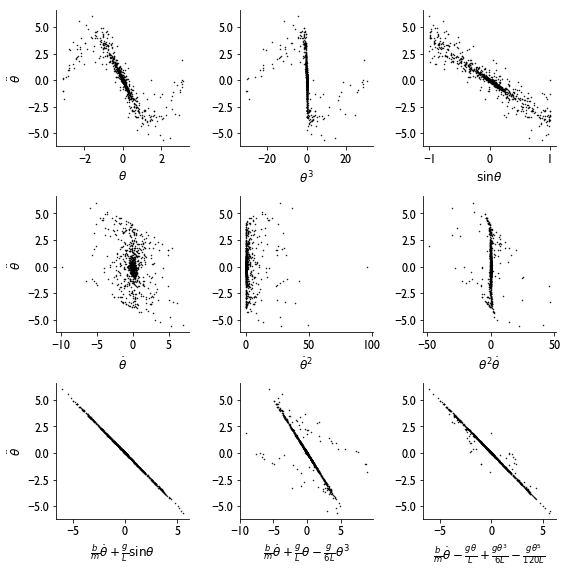

In [124]:
#plt.scatter(y, -b/m*X[:,8]- g/l*X[:,5])
#plt.scatter(X[:,0],X[:,1],s=1)
plt.figure(figsize=(8,8))
plt.subplot(331)
plt.scatter(X[:,0], y, s=1, marker=".", c="k")
plt.ylabel("$\\ddot{\\theta}$")
plt.xlabel("$\\theta$")
plt.subplot(332)
plt.scatter(X[:,2], y, s=1, marker=".", c="k")
plt.xlabel("$\\theta^3$")
plt.subplot(333)
plt.scatter(X[:,6], y, s=1, marker=".", c="k")
plt.xlabel("$\\sin \\theta$")

#row 2
plt.subplot(334)
plt.scatter(X[:,9], y, s=1, marker=".", c="k")
plt.ylabel("$\\ddot{\\theta}$")
plt.xlabel("$\\dot\\theta$")
plt.subplot(335)
plt.scatter(X[:,10], y, s=1, marker=".", c="k")
plt.xlabel("$\\dot{\\theta}^2$")
plt.subplot(336)
plt.scatter(X[:,19], y, s=1, marker=".", c="k")
plt.xlabel("$\\theta^2\\dot{\\theta}$")
#row 3
plt.subplot(337)
plt.scatter(b/m*X[:,9]+g/l*X[:,6], y, s=1, marker=".", c="k")
plt.ylabel("$\\ddot{\\theta}$")
plt.xlabel("$\\frac{b}{m}\\dot\\theta + \\frac{g}{L}\\sin \\theta $")
plt.subplot(338)
plt.scatter(b/m*X[:,9]+g/l*X[:,0]-g/l/6*X[:,2], y, s=1, marker=".", c="k")
plt.xlabel("$\\frac{b}{m}\\dot\\theta+\\frac{g }{L}\\theta-\\frac{g }{6 L}\\theta^3$")
plt.subplot(339)
plt.scatter(b/m*X[:,9]+g/l*X[:,0]-g/l/6*X[:,2]+g*X[:,4]/120/l, y, s=1, marker=".", c="k")
plt.xlabel("$\\frac{b}{m}\\dot\\theta-\\frac{g \\theta}{L}+\\frac{g \\theta^3}{6 L}-\\frac{g \\theta^5}{120 L}$")
plt.tight_layout()
#plt.subplots_adjust(bottom=0.9,top=1) #, right=1.8, top=0.9)
show("pendulum_scatter.pdf")

In [125]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0, normalize=True).fit(X, y)
reg.score(X, y) 
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
print("Velocity coeff should be", 0, "it is",reg.coef_[19])
lasso = reg.coef_.copy()
print(lasso)

Sin coeff should be -3.9240000000000004 it is -3.926222793851699
Velocity coeff should be -0.4 it is -0.38271215165951816
Velocity coeff should be 0 it is -0.004568298477862747
[-8.69278589e-05  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.92622279e+00  0.00000000e+00
 -0.00000000e+00 -3.82712152e-01  0.00000000e+00 -4.39172437e-05
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.56829848e-03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]


In [126]:
from sklearn.linear_model import ElasticNetCV
reg = ElasticNetCV(cv=5, random_state=0, normalize=True,l1_ratio=0.9).fit(X, y)
reg.score(X, y) 
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
el9 = reg.coef_.copy()
print(el9)

Sin coeff should be -3.9240000000000004 it is -3.535412453360846
Velocity coeff should be -0.4 it is -0.37824435206183193
[-3.36461143e-01 -0.00000000e+00  3.54410404e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.53541245e+00  0.00000000e+00
 -0.00000000e+00 -3.78244352e-01  0.00000000e+00 -1.18529633e-04
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -3.15798834e-03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -4.76415684e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00]


In [127]:
from sklearn.linear_model import ElasticNetCV
reg = ElasticNetCV(cv=5, random_state=0, normalize=True,l1_ratio=0.5).fit(X, y)
reg.score(X, y) 
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
el5 = reg.coef_.copy()
print(el5)

Sin coeff should be -3.9240000000000004 it is -2.9987912351358235
Velocity coeff should be -0.4 it is -0.32024786699901314
[-6.31151367e-01 -0.00000000e+00  3.01922660e-02 -0.00000000e+00
  3.66423775e-03  9.63328557e-03 -2.99879124e+00  6.84937043e-03
 -7.06907782e-03 -3.20247867e-01  0.00000000e+00 -2.23831714e-03
 -7.02695418e-06  6.95765792e-06  3.04038573e-03 -6.33671120e-02
  7.08124494e-03 -7.10350636e-03  3.02822114e-03 -1.04764338e-02
 -2.96613308e-03  0.00000000e+00 -6.00851073e-04  1.28039731e-04
  1.81998694e-04  5.39107741e-04 -7.89865165e-03  1.45496070e-03]


In [128]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV(cv=5, normalize=True).fit(X, y)
reg.score(X, y) 
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
ridge = reg.coef_.copy()
print(ridge)

Sin coeff should be -3.9240000000000004 it is -2.780715903524063
Velocity coeff should be -0.4 it is -0.2839586475902799
[-6.70557798e-01 -3.52838553e-03  2.34830479e-02  6.90929906e-04
  4.34778851e-03  3.39739010e-02 -2.78071590e+00  2.24128718e-02
 -2.24128718e-02 -2.83958648e-01  1.65471211e-03 -3.03449095e-03
 -5.45229941e-05  4.46281402e-06  2.47147162e-02 -9.39655501e-02
  1.94037450e-02 -1.94037450e-02  8.95702565e-03 -1.38861917e-02
 -6.05875867e-03  1.39330095e-04 -1.27599993e-03  2.08902806e-04
  2.17013906e-04  9.72863914e-04 -2.55593907e-02  1.03178513e-02]


In [129]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y) 
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
ls = reg.coef_.copy()
print(ls)

Sin coeff should be -3.9240000000000004 it is -3.6398634886940737
Velocity coeff should be -0.4 it is -0.3830770897713815
[-2.91793245e-01 -8.08758768e-02  4.72278832e-02  4.51513209e-03
 -1.82720904e-03 -1.82408815e-01 -3.63986349e+00 -5.24450647e-03
  5.24450647e-03 -3.83077090e-01  1.44264349e-04 -2.36491487e-05
 -8.06689895e-06 -8.16759244e-07  1.86075603e-03  2.78850717e-04
  2.67618916e-04 -2.67618916e-04 -5.94517398e-04 -5.00597908e-03
  4.71079666e-04  5.12144097e-05  9.26528466e-05  2.31279452e-05
  1.00313784e-07 -9.16772166e-05 -2.51588574e-03  1.39448487e-03]


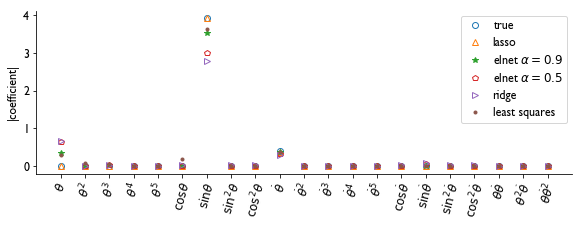

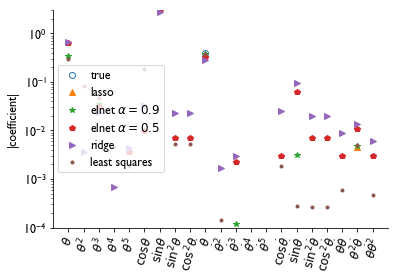

In [141]:
tval = 0*ls
tval[6] = -g/l
tval[9] = -b/m
my_xticks = np.array(np.arange(tval.size), dtype=str)
my_xticks[0] = "$\\theta$"
my_xticks[6] = "$\\sin\\theta$"
my_xticks[9] = "$\\dot\\theta$"
tmp = np.array(("$\\theta$", "$\\theta^2$", "$\\theta^3$", "$\\theta^4$", 
                "$\\theta^5$", "$\\cos\\theta$", "$\\sin\\theta$", 
                "$\\sin^2\\theta$", "$\\cos^2\\theta$","$\\dot\\theta$", 
                "$\\dot\\theta^2$", "$\\dot\\theta^3$", "$\\dot\\theta^4$", 
                "$\\dot\\theta^5$", "$\\cos\\dot\\theta$", "$\\sin\\dot\\theta$", 
                "$\\sin^2\\dot\\theta$", "$\\cos^2\\dot\\theta$",
                "$\\theta\\dot\\theta$", "$\\theta^2\\dot\\theta$", 
                "$\\theta\\dot\\theta^2$", "$\\theta^2 (\\dot\\theta)^2$", 
                "$(\\theta^3)*(\\dot\\theta)$", "$(\\theta)*(\\dot\\theta^3)$", 
                "$\\theta^2 \\dot\\theta^3$", "$(\\theta^3)*(\\dot\\theta^2)$",
                "$\\cos(\\theta*\\dot\\theta)$", "$\\sin(\\theta*\\dot\\theta)$"))
my_xticks[0:21]=tmp[0:21]
#print(my_xticks)
plt.figure(figsize=(3.2*3,3))
plt.plot(np.abs(tval[0:21]), 'o',label="true",fillstyle='none')
plt.plot(np.abs(lasso[0:21]), '^', label="lasso",fillstyle='none')
plt.plot(np.abs(el9[0:21]), '*', label="elnet $\\alpha=0.9$")
plt.plot(np.abs(el5[0:21]), 'p',label="elnet $\\alpha=0.5$",fillstyle='none')
plt.plot(np.abs(ridge[0:21]), '>', label="ridge",fillstyle='none')
plt.plot(np.abs(ls[0:21]), '.', label="least squares")
plt.xticks(np.arange(tval.size)[0:21],my_xticks[0:21],rotation=75);
plt.ylabel("|coefficient|")
plt.legend(loc="best")
show("pendulum_coeff.pdf")


plt.plot(np.abs(tval[0:21]), 'o',label="true",fillstyle='none')
plt.plot(np.abs(lasso[0:21]), '^', label="lasso")
plt.plot(np.abs(el9[0:21]), '*', label="elnet $\\alpha=0.9$")
plt.plot(np.abs(el5[0:21]), 'p',label="elnet $\\alpha=0.5$")
plt.plot(np.abs(ridge[0:21]), '>', label="ridge")
plt.semilogy(np.abs(ls[0:21]), '.', label="least squares")
plt.xticks(np.arange(tval.size)[0:21],my_xticks[0:21],rotation=75);
plt.ylabel("|coefficient|")
plt.ylim([1e-4,3])
plt.legend(loc=6)
show("pendulum_coeff_log.pdf")

In [4]:
def get_sample_with_noise(runs,points,noise=0.001):
    y_vect = np.zeros(runs*points)
    x_mat = np.zeros((runs*points, 28))
    basis_dict = lambda pos, vel: np.array([pos, pos**2, pos**3, pos**4, pos**5, math.cos(pos), math.sin(pos), math.sin(pos)**2, math.cos(pos)**2,
                                            vel, vel**2, vel**3, vel**4, vel**5, math.cos(vel), math.sin(vel), math.sin(vel)**2, math.cos(vel)**2,
                                            pos*vel, (pos**2)*vel, pos*vel**2, (pos**2)*(vel**2), (pos**3)*(vel), (pos)*(vel**3), (pos**2)*(vel**3), (pos**3)*(vel**2),
                                            math.cos(pos*vel), math.sin(pos*vel)])
    count = 0
    for run in range(runs):
        init_vel = random.uniform(a=-10,b=10)
        init_pos = random.uniform(a=-np.pi, b=np.pi)
        solution = solve_ivp(fun=RHS, y0=[init_vel, init_pos], t_span=[0,25], max_step=0.01, method="RK45")
        steps = solution.t.size
        chosen_points = np.random.randint(low=1, high=steps-1,size=points)
        velocity = solution.y[0,:] +np.random.normal(loc=0, scale=noise, size=steps)
        position = np.arctan2(np.sin(solution.y[1,:]),np.cos(solution.y[1,:])) +np.random.normal(loc=0, scale=noise, size=steps)
        for point in range(points):
            y_vect[count] = ((velocity[chosen_points[point]] - velocity[chosen_points[point]-1])/
                      (solution.t[chosen_points[point]] - solution.t[chosen_points[point]-1]))
            x_mat[count,:] = basis_dict(position[chosen_points[point]],
                                        velocity[chosen_points[point]])
            count += 1
    return y_vect, x_mat

In [152]:
y,X = get_sample_with_noise(100,10,0.01)

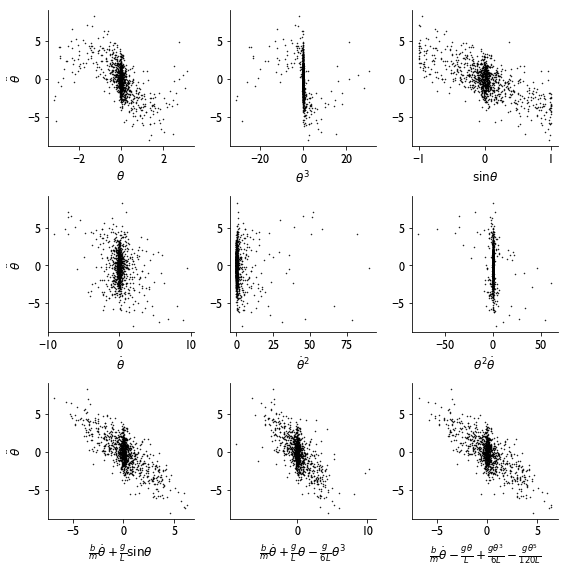

In [153]:
#plt.scatter(y, -b/m*X[:,8]- g/l*X[:,5])
#plt.scatter(X[:,0],X[:,1],s=1)
plt.figure(figsize=(8,8))
plt.subplot(331)
plt.scatter(X[:,0], y, s=1, marker=".", c="k")
plt.ylabel("$\\ddot{\\theta}$")
plt.xlabel("$\\theta$")
plt.subplot(332)
plt.scatter(X[:,2], y, s=1, marker=".", c="k")
plt.xlabel("$\\theta^3$")
plt.subplot(333)
plt.scatter(X[:,6], y, s=1, marker=".", c="k")
plt.xlabel("$\\sin \\theta$")

#row 2
plt.subplot(334)
plt.scatter(X[:,9], y, s=1, marker=".", c="k")
plt.ylabel("$\\ddot{\\theta}$")
plt.xlabel("$\\dot\\theta$")
plt.subplot(335)
plt.scatter(X[:,10], y, s=1, marker=".", c="k")
plt.xlabel("$\\dot{\\theta}^2$")
plt.subplot(336)
plt.scatter(X[:,19], y, s=1, marker=".", c="k")
plt.xlabel("$\\theta^2\\dot{\\theta}$")
#row 3
plt.subplot(337)
plt.scatter(b/m*X[:,9]+g/l*X[:,6], y, s=1, marker=".", c="k")
plt.ylabel("$\\ddot{\\theta}$")
plt.xlabel("$\\frac{b}{m}\\dot\\theta + \\frac{g}{L}\\sin \\theta $")
plt.subplot(338)
plt.scatter(b/m*X[:,9]+g/l*X[:,0]-g/l/6*X[:,2], y, s=1, marker=".", c="k")
plt.xlabel("$\\frac{b}{m}\\dot\\theta+\\frac{g }{L}\\theta-\\frac{g }{6 L}\\theta^3$")
plt.subplot(339)
plt.scatter(b/m*X[:,9]+g/l*X[:,0]-g/l/6*X[:,2]+g*X[:,4]/120/l, y, s=1, marker=".", c="k")
plt.xlabel("$\\frac{b}{m}\\dot\\theta-\\frac{g \\theta}{L}+\\frac{g \\theta^3}{6 L}-\\frac{g \\theta^5}{120 L}$")
plt.tight_layout()
#plt.subplots_adjust(bottom=0.9,top=1) #, right=1.8, top=0.9)
show("pendulum_scatter_noise.pdf")

In [154]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0, normalize=True).fit(X, y)
reg.score(X, y) 
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
reg.coef_

Sin coeff should be -3.9240000000000004 it is -3.817185369400481
Velocity coeff should be -0.4 it is -0.3668499539747843


array([-0.00000000e+00,  5.41861719e-03,  0.00000000e+00,  3.65342377e-04,
        2.18046351e-03, -0.00000000e+00, -3.81718537e+00, -1.28891132e-01,
        0.00000000e+00, -3.66849954e-01,  9.88673727e-03, -7.20823387e-04,
        0.00000000e+00, -0.00000000e+00,  1.52146465e-01, -8.72500075e-02,
        0.00000000e+00, -0.00000000e+00,  1.31569906e-02, -1.39219917e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -7.39314628e-04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.15086024e-03])

In [7]:
from sklearn.linear_model import ElasticNetCV
reg = ElasticNetCV(cv=5, random_state=0, normalize=True,l1_ratio=0.9).fit(X, y)
print(reg.score(X, y) )
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
reg.coef_

0.6941596519797074
Sin coeff should be -9.89849729138048 it is -7.73584679200085
Velocity coeff should be -1.3481031447886462 it is -1.1262307061214574


array([-1.51419249e+00,  6.94994994e-02,  4.86884055e-02,  4.02321175e-03,
        9.26803680e-03, -1.06255887e-01, -7.73584679e+00, -0.00000000e+00,
        0.00000000e+00, -1.12623071e+00,  0.00000000e+00, -3.43964081e-03,
        0.00000000e+00,  0.00000000e+00, -2.06952034e-01, -1.03206135e-01,
       -2.39252483e-01,  2.37963982e-01,  0.00000000e+00, -0.00000000e+00,
       -2.63396048e-02,  0.00000000e+00, -2.06690582e-02, -0.00000000e+00,
       -1.82145636e-03,  0.00000000e+00, -0.00000000e+00,  2.19259660e-01])

In [156]:
from sklearn.linear_model import ElasticNetCV
reg = ElasticNetCV(cv=5, random_state=0, normalize=True,l1_ratio=0.5).fit(X, y)
reg.score(X, y) 
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
el5 = reg.coef_.copy()
print(el5)

Sin coeff should be -3.9240000000000004 it is -2.7896160809351915
Velocity coeff should be -0.4 it is -0.3076587200362757
[-7.10381505e-01  1.49399237e-02  3.11484408e-02  0.00000000e+00
  7.00826407e-03 -7.92612238e-02 -2.78961608e+00 -1.19889216e-01
  1.19307494e-01 -3.07658720e-01  1.17901426e-02 -2.01149520e-03
  5.85862624e-05  0.00000000e+00  1.86692037e-01 -1.51483259e-01
  4.08999833e-02 -4.09797261e-02  2.82309061e-02 -1.43847054e-02
 -1.88627383e-03 -8.45983579e-04 -0.00000000e+00 -9.99603849e-04
  1.45529167e-05  4.20341593e-04  5.44304773e-02  0.00000000e+00]


In [157]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV(cv=5, normalize=True).fit(X, y)
reg.score(X, y) 
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
ridge = reg.coef_.copy()
print(ridge)

Sin coeff should be -3.9240000000000004 it is -2.6249684533376905
Velocity coeff should be -0.4 it is -0.28018404329773694
[-7.33160311e-01  1.75040433e-02  2.60732615e-02 -2.48764434e-04
  7.17863081e-03 -8.59775823e-02 -2.62496845e+00 -1.23362683e-01
  1.23362683e-01 -2.80184043e-01  1.00299862e-02 -2.30188433e-03
  9.27071129e-05 -1.62705909e-06  1.79079511e-01 -1.64252558e-01
  4.07558252e-02 -4.07558252e-02  2.56888786e-02 -1.75390453e-02
 -3.50121912e-03 -9.91794510e-04 -7.88120745e-05 -9.19185690e-04
  5.72817886e-05  6.74009101e-04  6.85885709e-02 -6.99798924e-03]


In [158]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y) 
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
ls = reg.coef_.copy()
print(ls)

Sin coeff should be -3.9240000000000004 it is 5.035808350362384
Velocity coeff should be -0.4 it is -0.37368808182828206
[-8.78227442e+00  1.52547779e+01  1.36781717e+00 -8.31311441e-01
 -4.54119898e-02  3.51210409e+01  5.03580835e+00  1.17159419e+00
 -1.17159419e+00 -3.73688082e-01  2.35429560e-02 -5.46255271e-04
 -1.14580171e-04 -7.10546331e-06  2.08316981e-01 -1.13254881e-01
  4.75851751e-02 -4.75851751e-02  5.67081649e-02 -1.04157773e-02
  1.02687133e-03 -9.16487672e-04 -4.11801167e-03 -1.19126250e-03
 -1.15410573e-06 -3.81198753e-04  7.75373974e-02 -2.31791585e-03]


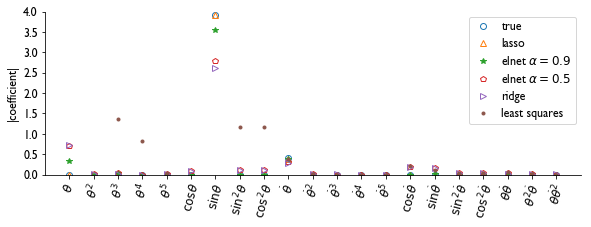

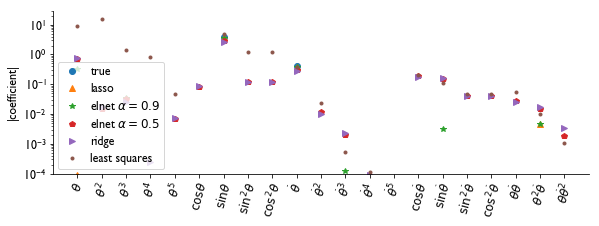

In [164]:
tval = 0*ls
tval[6] = -g/l
tval[9] = -b/m
my_xticks = np.array(np.arange(tval.size), dtype=str)
my_xticks[0] = "$\\theta$"
my_xticks[6] = "$\\sin\\theta$"
my_xticks[9] = "$\\dot\\theta$"
tmp = np.array(("$\\theta$", "$\\theta^2$", "$\\theta^3$", "$\\theta^4$", 
                "$\\theta^5$", "$\\cos\\theta$", "$\\sin\\theta$", 
                "$\\sin^2\\theta$", "$\\cos^2\\theta$","$\\dot\\theta$", 
                "$\\dot\\theta^2$", "$\\dot\\theta^3$", "$\\dot\\theta^4$", 
                "$\\dot\\theta^5$", "$\\cos\\dot\\theta$", "$\\sin\\dot\\theta$", 
                "$\\sin^2\\dot\\theta$", "$\\cos^2\\dot\\theta$",
                "$\\theta\\dot\\theta$", "$\\theta^2\\dot\\theta$", 
                "$\\theta\\dot\\theta^2$", "$\\theta^2 (\\dot\\theta)^2$", 
                "$(\\theta^3)*(\\dot\\theta)$", "$(\\theta)*(\\dot\\theta^3)$", 
                "$\\theta^2 \\dot\\theta^3$", "$(\\theta^3)*(\\dot\\theta^2)$",
                "$\\cos(\\theta*\\dot\\theta)$", "$\\sin(\\theta*\\dot\\theta)$"))
my_xticks[0:21]=tmp[0:21]
#print(my_xticks)
plt.figure(figsize=(3.2*3,3))
plt.plot(np.abs(tval[0:21]), 'o',label="true",fillstyle='none')
plt.plot(np.abs(lasso[0:21]), '^', label="lasso",fillstyle='none')
plt.plot(np.abs(el9[0:21]), '*', label="elnet $\\alpha=0.9$")
plt.plot(np.abs(el5[0:21]), 'p',label="elnet $\\alpha=0.5$",fillstyle='none')
plt.plot(np.abs(ridge[0:21]), '>', label="ridge",fillstyle='none')
plt.plot(np.abs(ls[0:21]), '.', label="least squares")
plt.xticks(np.arange(tval.size)[0:21],my_xticks[0:21],rotation=75);
plt.ylabel("|coefficient|")
plt.ylim([0,4])
plt.legend(loc="best")
show("pendulum_coeff_noise.pdf")


plt.figure(figsize=(3.2*3,3))
plt.plot(np.abs(tval[0:21]), 'o',label="true")
plt.plot(np.abs(lasso[0:21]), '^', label="lasso")
plt.plot(np.abs(el9[0:21]), '*', label="elnet $\\alpha=0.9$")
plt.plot(np.abs(el5[0:21]), 'p',label="elnet $\\alpha=0.5$")
plt.plot(np.abs(ridge[0:21]), '>', label="ridge")
plt.semilogy(np.abs(ls[0:21]), '.', label="least squares")
plt.xticks(np.arange(tval.size)[0:21],my_xticks[0:21],rotation=75);
plt.ylabel("|coefficient|")
plt.ylim([1e-4,30])
plt.legend(loc="best")
show("pendulum_coeff_log_noise.pdf")

In [185]:
def get_sample_small(runs,points):
    y_vect = np.zeros(runs*points)
    x_mat = np.zeros((runs*points, 28))
    basis_dict = lambda pos, vel: np.array([pos, pos**2, pos**3, pos**4, pos**5, 0*pos**6, 0*pos**7, math.sin(pos)**2, math.cos(pos)**2,
                                            vel, vel**2, vel**3, vel**4, vel**5, math.cos(vel), math.sin(vel), math.sin(vel)**2, math.cos(vel)**2,
                                            pos*vel, (pos**2)*vel, pos*vel**2, (pos**2)*(vel**2), (pos**3)*(vel), (pos)*(vel**3), (pos**2)*(vel**3), (pos**3)*(vel**2),
                                            math.cos(pos*vel), math.sin(pos*vel)])
    count = 0
    
    for run in range(runs):
        init_vel = random.uniform(a=-0.01,b=0.01)
        init_pos = random.uniform(a=-np.pi/100, b=np.pi/100)
        solution = solve_ivp(fun=RHS, y0=[init_vel, init_pos], t_span=[0,25], max_step=0.01, method="RK45")
        steps = solution.t.size
        chosen_points = np.random.randint(low=1, high=steps-1,size=points)
        velocity = solution.y[0,:].copy()
        position = solution.y[1,:].copy()
        for point in range(points):
            y_vect[count] = ((velocity[chosen_points[point]] - velocity[chosen_points[point]-1])/
                      (solution.t[chosen_points[point]] - solution.t[chosen_points[point]-1]))
            x_mat[count,:] = basis_dict(position[chosen_points[point]],
                                        velocity[chosen_points[point]])
            count += 1
    return y_vect, x_mat

In [186]:
y,X = get_sample_small(10,100)

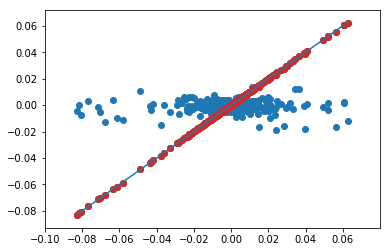

In [187]:
plt.scatter(y, -b/m*X[:,9]- g/l*X[:,6])
plt.scatter(y, -b/m*X[:,9]-g/l*X[:,0]+X[:,2]/6*g/l - g/l/120*X[:,4])
plt.scatter(y, -b/m*X[:,9]-g/l*X[:,0]+X[:,2]/6*g/l - 0*g/l/120*X[:,4])
plt.scatter(y, -b/m*X[:,9]-g/l*X[:,0]+0*X[:,2]/6*g/l - 0*g/l/120*X[:,4])
plt.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)])

In [6]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0, normalize=True).fit(X, y)
print(reg.score(X, y) )
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("pos coeff should be", -g/l, "it is",reg.coef_[0])
print("pos^3 coeff should be", g/l/6, "it is",reg.coef_[2])
print("pos^5 coeff should be", -g/l/120, "it is",reg.coef_[4])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
reg.coef_

0.6897927995926505
Sin coeff should be -9.89849729138048 it is -9.653657674436273
pos coeff should be -9.89849729138048 it is -0.042188935965001
pos^3 coeff should be 1.6497495485634133 it is -0.0
pos^5 coeff should be -0.08248747742817067 it is -0.0
Velocity coeff should be -1.3481031447886462 it is -1.1722960033923944


array([-4.21889360e-02,  6.95167699e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -9.65365767e+00,  0.00000000e+00,
       -0.00000000e+00, -1.17229600e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.53700860e-04, -1.35863968e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [189]:
reg = ElasticNetCV(cv=5, random_state=0, normalize=True, l1_ratio=0.8).fit(X, y)
print(reg.score(X, y) )
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("pos coeff should be", -g/l, "it is",reg.coef_[0])
print("pos^3 coeff should be", g/l/6, "it is",reg.coef_[2])
print("pos^5 coeff should be", -g/l/120, "it is",reg.coef_[4])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
reg.coef_

0.999997437441144
Sin coeff should be -3.9240000000000004 it is 0.0
pos coeff should be -3.9240000000000004 it is -3.9265130851032275
pos^3 coeff should be 0.654 it is -0.0
pos^5 coeff should be -0.0327 it is -0.0
Velocity coeff should be -0.4 it is -0.3698608000518033


array([-3.92651309, -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.3698608 ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.0088393 , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ])

In [190]:
def get_sample_small_noise(runs,points, noise=0.0001):
    y_vect = np.zeros(runs*points)
    x_mat = np.zeros((runs*points, 28))
    basis_dict = lambda pos, vel: np.array([pos, pos**2, pos**3, pos**4, pos**5, math.cos(pos), 0*math.sin(pos), math.sin(pos)**2, math.cos(pos)**2,
                                            vel, vel**2, vel**3, vel**4, vel**5, math.cos(vel), math.sin(vel), math.sin(vel)**2, math.cos(vel)**2,
                                            pos*vel, (pos**2)*vel, pos*vel**2, (pos**2)*(vel**2), (pos**3)*(vel), (pos)*(vel**3), (pos**2)*(vel**3), (pos**3)*(vel**2),
                                            math.cos(pos*vel), math.sin(pos*vel)])
    count = 0
    
    for run in range(runs):
        init_vel = random.uniform(a=-0.01,b=0.01)
        init_pos = random.uniform(a=-np.pi/10, b=np.pi/10)
        solution = solve_ivp(fun=RHS, y0=[init_vel, init_pos], t_span=[0,25], max_step=0.01, method="RK45")
        steps = solution.t.size
        chosen_points = np.random.randint(low=1, high=steps-1,size=points)
        velocity = solution.y[0,:] + np.random.normal(loc=0, scale=noise, size=steps)
        position = np.arctan2(np.sin(solution.y[1,:]),np.cos(solution.y[1,:])) + np.random.normal(loc=0, scale=noise, size=steps)
        for point in range(points):
            y_vect[count] = ((velocity[chosen_points[point]] - velocity[chosen_points[point]-1])/
                      (solution.t[chosen_points[point]] - solution.t[chosen_points[point]-1]))
            x_mat[count,:] = basis_dict(position[chosen_points[point]],
                                        velocity[chosen_points[point]])
            count += 1
    return y_vect, x_mat

In [191]:
y,X = get_sample_small_noise(100,10)

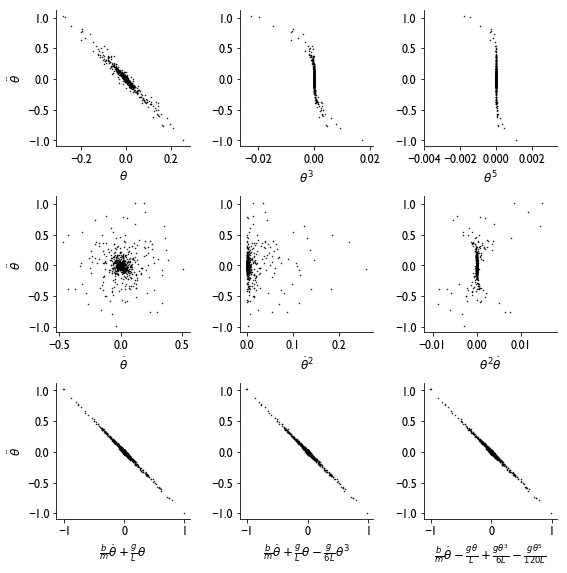

In [192]:
#plt.scatter(y, -b/m*X[:,8]- g/l*X[:,5])
#plt.scatter(X[:,0],X[:,1],s=1)
plt.figure(figsize=(8,8))
plt.subplot(331)
plt.scatter(X[:,0], y, s=1, marker=".", c="k")
plt.ylabel("$\\ddot{\\theta}$")
plt.xlabel("$\\theta$")
plt.subplot(332)
plt.scatter(X[:,2], y, s=1, marker=".", c="k")
plt.xlabel("$\\theta^3$")
plt.subplot(333)
plt.scatter(X[:,4], y, s=1, marker=".", c="k")
plt.xlabel("$\\theta^5$")

#row 2
plt.subplot(334)
plt.scatter(X[:,9], y, s=1, marker=".", c="k")
plt.ylabel("$\\ddot{\\theta}$")
plt.xlabel("$\\dot\\theta$")
plt.subplot(335)
plt.scatter(X[:,10], y, s=1, marker=".", c="k")
plt.xlabel("$\\dot{\\theta}^2$")
plt.subplot(336)
plt.scatter(X[:,19], y, s=1, marker=".", c="k")
plt.xlabel("$\\theta^2\\dot{\\theta}$")
#row 3
plt.subplot(337)
plt.scatter(b/m*X[:,9]+g/l*X[:,0], y, s=1, marker=".", c="k")
plt.ylabel("$\\ddot{\\theta}$")
plt.xlabel("$\\frac{b}{m}\\dot\\theta + \\frac{g}{L}\\theta $")
plt.subplot(338)
plt.scatter(b/m*X[:,9]+g/l*X[:,0]-g/l/6*X[:,2], y, s=1, marker=".", c="k")
plt.xlabel("$\\frac{b}{m}\\dot\\theta+\\frac{g }{L}\\theta-\\frac{g }{6 L}\\theta^3$")
plt.subplot(339)
plt.scatter(b/m*X[:,9]+g/l*X[:,0]-g/l/6*X[:,2]+g*X[:,4]/120/l, y, s=1, marker=".", c="k")
plt.xlabel("$\\frac{b}{m}\\dot\\theta-\\frac{g \\theta}{L}+\\frac{g \\theta^3}{6 L}-\\frac{g \\theta^5}{120 L}$")
plt.tight_layout()
#plt.subplots_adjust(bottom=0.9,top=1) #, right=1.8, top=0.9)
show("pendulum_scatter_small.pdf")

In [193]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0, normalize=True).fit(X, y)
print(reg.score(X, y) )
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("pos coeff should be", -g/l, "it is",reg.coef_[0])
print("pos^3 coeff should be", g/l/6, "it is",reg.coef_[2])
print("pos^5 coeff should be", -g/l/120, "it is",reg.coef_[4])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
reg.coef_

0.992620908031947
Sin coeff should be -3.9240000000000004 it is 0.0
pos coeff should be -3.9240000000000004 it is -3.919316857414025
pos^3 coeff should be 0.654 it is 0.0
pos^5 coeff should be -0.0327 it is 0.0
Velocity coeff should be -0.4 it is -0.37929289569200814


array([-3.91931686e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -3.79292896e-01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -2.91048175e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -4.17960436e-01,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [194]:
reg = ElasticNetCV(cv=5, random_state=0, normalize=True, l1_ratio=0.9).fit(X, y)
print(reg.score(X, y) )
print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
print("pos coeff should be", -g/l, "it is",reg.coef_[0])
print("pos^3 coeff should be", g/l/6, "it is",reg.coef_[2])
print("pos^5 coeff should be", -g/l/120, "it is",reg.coef_[4])
print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
reg.coef_

0.9926314793180994
Sin coeff should be -3.9240000000000004 it is 0.0
pos coeff should be -3.9240000000000004 it is -3.9183530493656327
pos^3 coeff should be 0.654 it is -0.0
pos^5 coeff should be -0.0327 it is 0.0
Velocity coeff should be -0.4 it is -0.26937962164779466


array([-3.91835305,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.26937962,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.11301716,  0.        , -0.        ,  0.        , -0.48393862,
       -0.04684246, -0.        ,  0.34189708,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

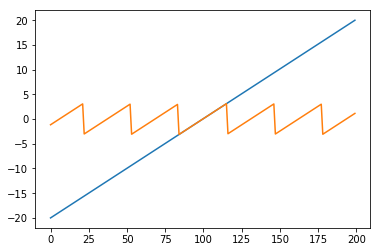

In [195]:
wrp = lambda x: x - y * floor(x/y)
x = np.linspace(-20,20,200)
plt.plot(x)
plt.plot(np.arctan2(np.sin(x),np.cos(x)))

In [92]:
X[0:10,0]

array([-0.59188393, -0.00855096, -0.07248063, -0.59188393,  0.05422421,
       -0.06956196,  0.06486062,  2.3227369 , -0.05790075, -0.00309081])

Run several pendula of different masses, lengths, and damping forces

In [8]:
pendula = 10

xdata = np.zeros((pendula,6))
ydata = np.zeros((pendula,2))
ydata_el = np.zeros((pendula,2))

for p in range(pendula):
    b = np.random.uniform(low=0.01,high=0.5)
    l = np.random.uniform(low=0.24,high=4)
    g = 9.81
    m = np.random.uniform(low=0.01,high=0.5)

    y,X = get_sample_with_noise(100,10,0.01)

    reg = LassoCV(cv=5, random_state=0, normalize=True).fit(X, y)
    reg.score(X, y) 
    print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
    print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
    ydata[p,:] = (reg.coef_[6],reg.coef_[9])
    

    reg = ElasticNetCV(cv=5, random_state=0, normalize=True, l1_ratio=0.9).fit(X, y)
    reg.score(X, y) 
    print("Sin coeff should be", -g/l, "it is",reg.coef_[6])
    print("Velocity coeff should be", -b/m, "it is",reg.coef_[9])
    ydata_el[p,:] = (reg.coef_[6],reg.coef_[9])
    xdata[p,:] = [g/l,b**2/m**2,(g/b*m/l)**2,b/m,np.sqrt(g/l),g/b*m/l]

Sin coeff should be -6.722467115159711 it is -6.7949975939252285
Velocity coeff should be -0.547341847763706 it is -0.35528471842756487
Sin coeff should be -6.722467115159711 it is -5.725827353361711
Velocity coeff should be -0.547341847763706 it is -0.3344382314040437


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Sin coeff should be -5.171724079721159 it is -4.667183625006961
Velocity coeff should be -1.1936626321279944 it is -1.1422692988922374
Sin coeff should be -5.171724079721159 it is -4.191963557916289
Velocity coeff should be -1.1936626321279944 it is -0.9973893235202824
Sin coeff should be -3.648565581978785 it is -3.5291436016907225
Velocity coeff should be -0.7376519614421051 it is -0.6600269980697242
Sin coeff should be -3.648565581978785 it is -3.3093378925499928
Velocity coeff should be -0.7376519614421051 it is -0.5643905177079117


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Sin coeff should be -4.340657771499982 it is -3.762255312594479
Velocity coeff should be -2.0629721963458323 it is -2.037092106093335
Sin coeff should be -4.340657771499982 it is -2.578158403937695
Velocity coeff should be -2.0629721963458323 it is -1.9659342992761946
Sin coeff should be -12.500411271645483 it is -12.346324141525502
Velocity coeff should be -0.4525465813984362 it is -0.28302778851757704
Sin coeff should be -12.500411271645483 it is -9.881383548786326
Velocity coeff should be -0.4525465813984362 it is -0.2736097264500034
Sin coeff should be -19.73515986580222 it is -19.873654249181644
Velocity coeff should be -0.5735722467704649 it is -0.46819272522305333
Sin coeff should be -19.73515986580222 it is -15.271548341631794
Velocity coeff should be -0.5735722467704649 it is -0.42835866736936373
Sin coeff should be -10.019845082683036 it is -9.954257633024278
Velocity coeff should be -0.5417296558259791 it is -0.49232725752883444
Sin coeff should be -10.019845082683036 it is 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Sin coeff should be -3.4962323089542298 it is -3.6504295650653042
Velocity coeff should be -1.005119849418798 it is -0.8936793802537698
Sin coeff should be -3.4962323089542298 it is -3.101196242272173
Velocity coeff should be -1.005119849418798 it is -0.7544547403751957
Sin coeff should be -3.6113939844102148 it is -3.6538416702999763
Velocity coeff should be -0.3024289233164729 it is -0.26268457017160596
Sin coeff should be -3.6113939844102148 it is -2.9099851779153716
Velocity coeff should be -0.3024289233164729 it is -0.2596551049671881
Sin coeff should be -2.5069600889774573 it is -2.214492400320615
Velocity coeff should be -0.5148547161037809 it is -0.4132975013763191
Sin coeff should be -2.5069600889774573 it is -1.9728628212875043
Velocity coeff should be -0.5148547161037809 it is -0.36103733989760717


In [9]:
reg_coef = LassoCV(cv=5, random_state=0, normalize=True).fit(xdata[:,0:3],ydata[:,0])
print(reg_coef.coef_)

reg_coef = LassoCV(cv=5, random_state=0, normalize=True).fit(xdata[:,3:6],ydata[:,1])
print(reg_coef.coef_)

[-9.95185540e-01  1.03165625e-01 -1.12551043e-04]
[-1.03442977  0.00866242  0.        ]


In [23]:
import array_to_latex
array_to_latex.to_ltx(ydata,frmt='{:6.4f}')
array_to_latex.to_ltx(np.hstack((ydata,xdata)),frmt='{:6.4f}')

\begin{bmatrix}
 -6.795 & -0.355\\
 -4.667 & -1.142\\
 -3.529 & -0.660\\
 -3.762 & -2.037\\
 -12.346 & -0.283\\
 -19.873 & -0.468\\
 -9.954 & -0.492\\
 -3.650 & -0.893\\
 -3.653 & -0.262\\
 -2.214 & -0.413
\end{bmatrix}
None
\begin{bmatrix}
 -6.795 & -0.355 &  6.722 &  0.299 &  150.848 &  0.547 &  2.592 &  12.282\\
 -4.667 & -1.142 &  5.171 &  1.424 &  18.771 &  1.193 &  2.274 &  4.332\\
 -3.529 & -0.660 &  3.648 &  0.544 &  24.464 &  0.737 &  1.910 &  4.946\\
 -3.762 & -2.037 &  4.340 &  4.255 &  4.427 &  2.063 &  2.083 &  2.104\\
 -12.346 & -0.283 &  12.500 &  0.204 &  762.995 &  0.452 &  3.535 &  27.622\\
 -19.873 & -0.468 &  19.735 &  0.329 &  1183.872 &  0.573 &  4.442 &  34.407\\
 -9.954 & -0.492 &  10.019 &  0.293 &  342.102 &  0.541 &  3.165 &  18.496\\
 -3.650 & -0.893 &  3.496 &  1.010 &  12.099 &  1.005 &  1.869 &  3.478\\
 -3.653 & -0.262 &  3.611 &  0.091 &  142.594 &  0.302 &  1.900 &  11.941\\
 -2.214 & -0.413 &  2.507 &  0.265 &  23.709 &  0.514 &  1.583 &  4.869
\end{b

In [166]:
xdata

array([[3.02894598e+00, 4.26663229e-01, 2.15029398e+01, 6.53194634e-01,
        1.74038673e+00, 4.63712625e+00],
       [2.87134837e+00, 8.36211386e-01, 9.85951831e+00, 9.14445945e-01,
        1.69450535e+00, 3.13998699e+00],
       [8.72016903e+00, 1.99465102e+00, 3.81226326e+01, 1.41232114e+00,
        2.95299323e+00, 6.17435281e+00],
       [3.21842868e+01, 5.37914777e-02, 1.92563648e+04, 2.31929898e-01,
        5.67311967e+00, 1.38767304e+02],
       [3.16982695e+00, 4.54649379e-01, 2.21001135e+01, 6.74276931e-01,
        1.78040078e+00, 4.70107578e+00],
       [9.42920404e+00, 8.98346908e-02, 9.89705513e+02, 2.99724358e-01,
        3.07070090e+00, 3.14595854e+01],
       [2.47693593e+01, 9.35831104e-01, 6.55589622e+02, 9.67383639e-01,
        4.97688249e+00, 2.56044844e+01],
       [1.10092547e+01, 1.59970848e+00, 7.57661100e+01, 1.26479583e+00,
        3.31801969e+00, 8.70437304e+00],
       [4.36594235e+00, 5.00649613e+00, 3.80734392e+00, 2.23752008e+00,
        2.08948375e+00, 